### Please install the required Python modules/SDKs

In [31]:
! activate ai-azure-c1

import sys

sys.path.append("/opt/conda/envs/ai-azure-c1/lib/python3.8/site-packages")

## Importing utility functions and Python modules

In [32]:
import requests
from urllib.parse import urlparse
from io import BytesIO
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

In [33]:
def show_image_in_cell(face_url):
    response = requests.get(face_url)
    img = Image.open(BytesIO(response.content))
    plt.figure(figsize=(20,10))
    plt.imshow(img)
    plt.show()

## Importing Custom Vision Modules

In [34]:
from azure.cognitiveservices.vision.customvision.training import CustomVisionTrainingClient
from azure.cognitiveservices.vision.customvision.prediction import CustomVisionPredictionClient
from azure.cognitiveservices.vision.customvision.training.models import ImageFileCreateBatch, ImageFileCreateEntry, Region
from msrest.authentication import ApiKeyCredentials
import os, time, uuid

In [44]:
training_key = "EkHl7qRyWi9X6YLShNF6LoNY9iLDE3ILWhnw4IzhfKm4DbkYoitHJQQJ99BGACYeBjFXJ3w3AAAJACOG6s1J"

## Please enter prediction resource specific details below

In [46]:
# Replace with valid values
ENDPOINT = "https://mycustomvision191662prediction-prediction.cognitiveservices.azure.com/"
prediction_key = "2uGJMWOb1wVTYAojJA8DzLbDke23da9UjcJj7DkUmldyUaazn0D8JQQJ99BGACYeBjFXJ3w3AAAIACOGQo9q"
prediction_resource_id = "/subscriptions/7e79d3cd-5b8c-4a3d-9824-e6025c5b6467/resourceGroups/ODL-AIND-191662/providers/Microsoft.CognitiveServices/accounts/mycustomvision191662Prediction"

In [47]:
prediction_credentials = ApiKeyCredentials(in_headers={"Prediction-key": prediction_key})
predictor = CustomVisionPredictionClient(ENDPOINT, prediction_credentials)

In [48]:
predictor.api_version

'3.1'

### If you want to use a test image from local file system, follow these steps:
* We have saved three test images within this workspace environment. 

In [49]:
# Get current working directory
# The output will give you the "local_image_path" used in the cell below
!pwd

/workspace/home


In [50]:
# To list the folders/files in your current working directory
# The name of any image file can be used as "file_name" in the cell below
!ls

architecture-images
bird.jpg
flower.jpg
image_01.jpg
interior-images
L5 Demo 1 - Predict API.ipynb
L5 Demo 2 - Image Classification.ipynb
L5 DEMO Export Object Detection Model to Disk.ipynb
L5 DEMO Object Detection.ipynb
L5 Image Classification Exercise.ipynb
L5 Image Classification Exercise Solution.ipynb
L5 Object Detection Exercise.ipynb
L5 Object Detection Exercise Solution.ipynb
L5.zip
nature-images
test-architecture-01.jpeg
test-architecture-01.jpg
test-nature-01.jpeg
test-nature-01.jpg
test-nature-02.jpeg
test-nature-02.jpg


In [51]:
local_image_path = '/workspace/home'
file_name = 'test-nature-01.jpg'

In [56]:
project_id = '25d94b16-822b-4f78-8ce8-6d4f624401b0'
publish_iteration_name = "Iteration1"

In [57]:
with open(os.path.join (local_image_path, file_name), "rb") as image_contents:
    results = predictor.classify_image(project_id, publish_iteration_name, image_contents.read())

    # Display the results.
    for prediction in results.predictions:
        print("\t" + prediction.tag_name +
              ": {0:.2f}%".format(prediction.probability * 100))

	Nature: 92.67%
	Architecture: 5.69%
	Interior: 1.64%


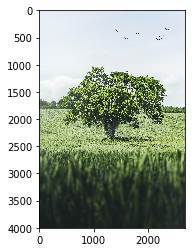

In [58]:
with open(os.path.join (local_image_path, file_name), 'rb') as img_code:
    img_view_ready = Image.open(img_code)
    plt.figure()
    plt.imshow(img_view_ready)

### If you want to use a test image from the Internet, follow these steps:
* The test image used in the demo is https://raw.githubusercontent.com/udacity/cd0461-building-computer-vision-solutions-with-azure-exercises/main/resources/test-nature-02.jpg. You can also use another image of your own.

In [63]:
test_image_url = "https://nomapgh.org/wp-content/uploads/2023/11/Arch2O-10-of-the-most-eye-opening-iconic-buildings-of-modern-architecture.jpg"

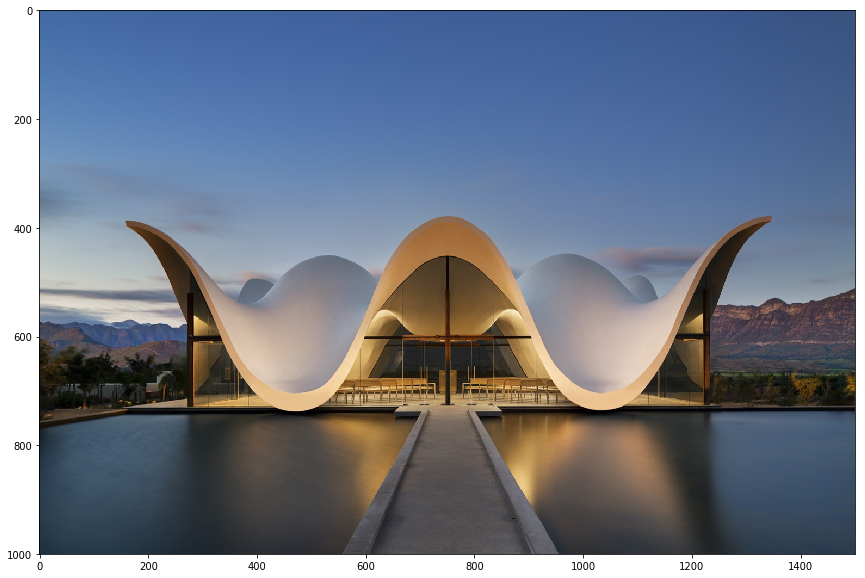

In [64]:
show_image_in_cell(test_image_url)

In [65]:
results = predictor.classify_image_url(project_id,publish_iteration_name,url=test_image_url)

In [66]:
# Display the results form the URL image
for prediction in results.predictions:
    print("\t" + prediction.tag_name +
          ": {0:.2f}%".format(prediction.probability * 100))

	Architecture: 97.81%
	Interior: 2.01%
	Nature: 0.18%
